## Problem Statement

The goal is to create a classification model to predict whether a patient has a hear disease or not based on some physical features. 

The description of data is below:

Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.


Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart_disease_prediction.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


There are 303 rows in the dataset.


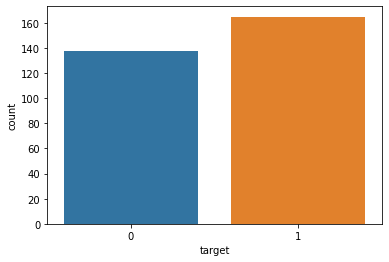

In [6]:
sns.countplot(x='target', data = df)
print(f"There are {len(df)} rows in the dataset.")

So out of 303 rows, we see that majority of the patients do have heart disease. Let us check which parameters have the mosr prominent effect on the target column.

In [7]:
df.corr()['target'].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

We see that the columns cp, thalach, exang, oldpeak, ca and slope have the maximum influence on our target. Let us visualize the pairplots for the said columns. Also, let us plot a heatmap to view the correlation firsthand.

<AxesSubplot:>

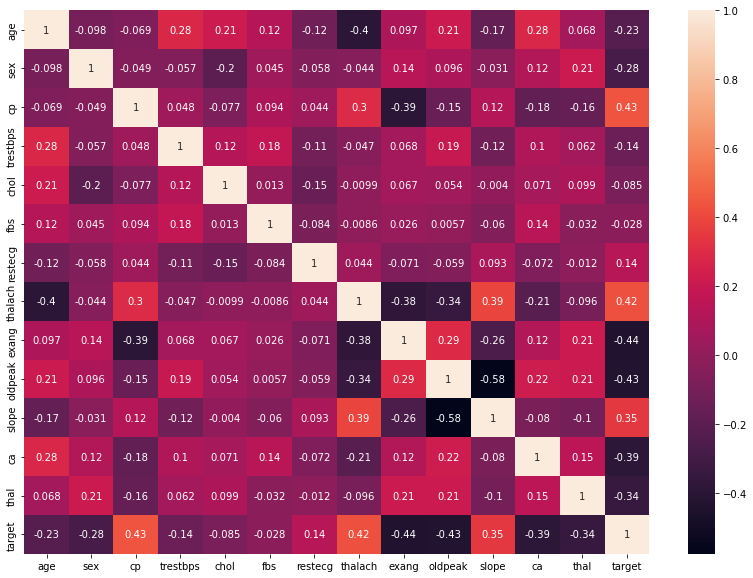

In [8]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)

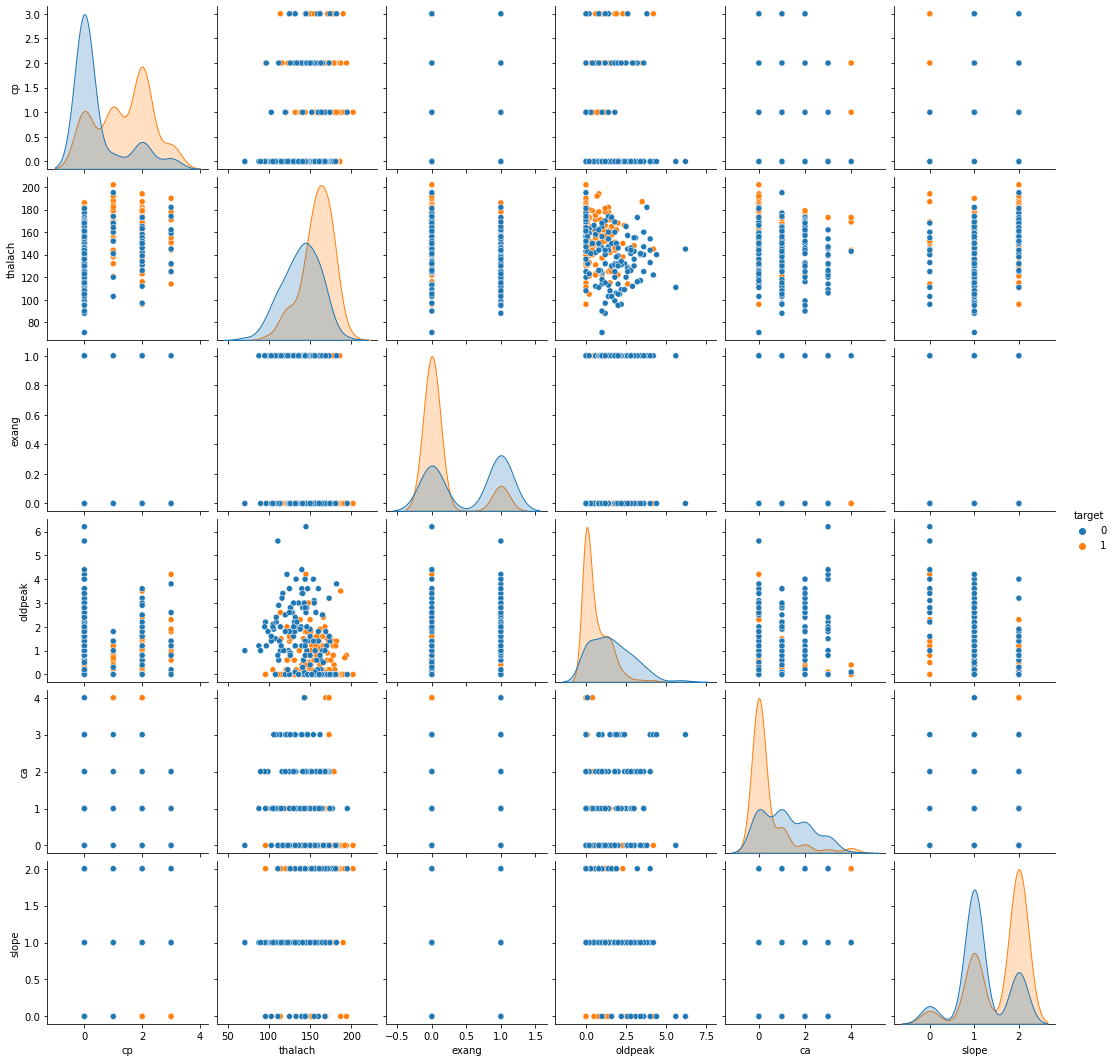

In [9]:
sns.pairplot(data=df[['cp','thalach','exang','oldpeak','ca','slope','target']], hue = 'target')

Although, the above plot does give a glimpse of the behaviour of the dataset, the most basic question which comes to our mind is always the age and we expect that a higher age leads to higher chances of heart disease, let us check that out!


<AxesSubplot:xlabel='target', ylabel='age'>

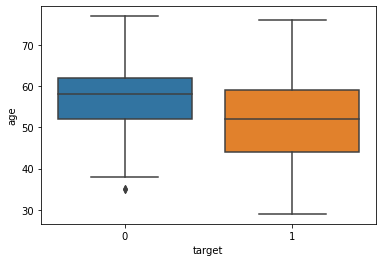

In [10]:
sns.boxplot(x = 'target',y='age', data = df)

In [11]:
print(f"The median age of patients who don't have the disease is {np.round(np.median(df['age'][df['target'] == 0]),0)}.")
print(f"The median age of patients who have the disease is {np.round(np.median(df['age'][df['target'] == 1]),0)}.")

The median age of patients who don't have the disease is 58.0.
The median age of patients who have the disease is 52.0.


**Well, that was unexpected!!! NEVER TRUST YOUR INSTINCTS, ALWAYS THE DATA.**

### Logistic Regression Model

**Train-Test-Split**

In [12]:
X = df.drop('target',axis=1)
y = df['target']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Scaling the data**

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**Building the model**

We will use LogisticRegressionCV here, which performs Grid Search Cross validation while finding the best model parameters. We will go with the default solver lgbfs which uses L2 regularization for looking overfitting.

In [15]:
from sklearn.linear_model import LogisticRegressionCV 

In [16]:
log_model = LogisticRegressionCV(Cs=10)
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [17]:
#checking the model coefficients for best performance
log_model.coef_

array([[-0.18947375, -0.65270543,  0.79792154, -0.29308592, -0.20648281,
         0.195486  ,  0.19210778,  0.27297046, -0.4209756 , -0.53374694,
         0.34819245, -0.64312736, -0.47059692]])

In [18]:
df_coef = pd.Series(index=X.columns, data = log_model.coef_[0]).sort_values()

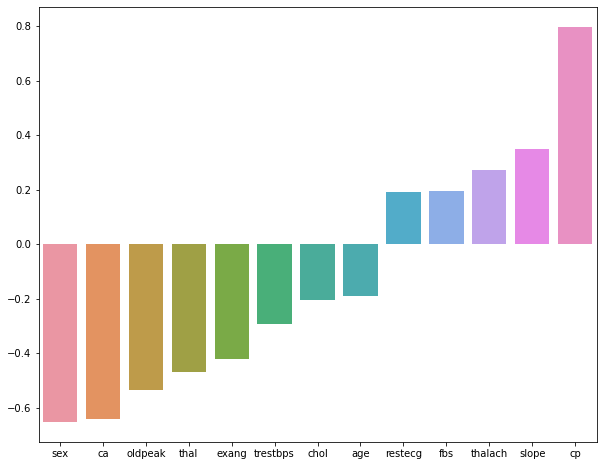

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_coef.index,y=df_coef.values);

Thus, we see which features have a positive influence on getting 1 and which have an inverse influence (this could also be estimated using the heatmap above).

## Evaluating Model Performance

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score
y_pred = log_model.predict(scaled_X_test)

**Accuracy Score**

In [24]:
round(accuracy_score(y_test,y_pred),3)

0.846

**Confusion Matrix**

In [25]:
confusion_matrix(y_test,y_pred)

array([[34, 10],
       [ 4, 43]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


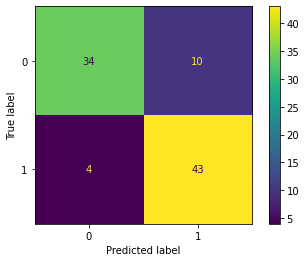

In [26]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

**Recall and Precision**

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        44
           1       0.81      0.91      0.86        47

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



**ROC Curve**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


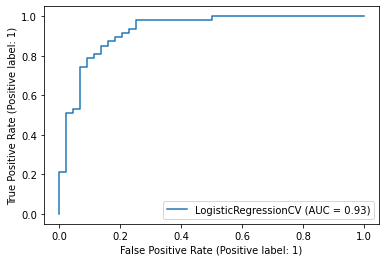

In [29]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model,scaled_X_test,y_test)

### Testing the model

Let us take the 10th row of X_test and pass it to our model to check if our model is performing correctly or not.

In [36]:
X_test.iloc[10]

age          54.0
sex           1.0
cp            0.0
trestbps    110.0
chol        239.0
fbs           0.0
restecg       1.0
thalach     126.0
exang         1.0
oldpeak       2.8
slope         1.0
ca            1.0
thal          3.0
Name: 224, dtype: float64

In [40]:
test_row = [[54, 1, 0, 110, 239, 0, 1, 126, 1 , 2.8, 1, 1, 3]]

In [39]:
y_test.iloc[10]

0

In [41]:
log_model.predict(test_row)

array([0], dtype=int64)

In [42]:
log_model.predict_proba(test_row)

array([[1.00000000e+00, 2.48804335e-27]])

Thus, for our test row the probability of getting 0 is way more than the probability of getting 1 and that is also what the output in y_test always shows.

However, it may happen that for some other row of X_test, we may not be able to macth the model's output with the Y_test (Check index 9!). This is because our model does not produce all true positives and true negatives (Check the Confusion Matrix).